In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
import plotly.express as px

from xgboost.sklearn import XGBClassifier
df=pd.read_csv("emp_att.csv")


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Indepedent variables that can be used: Age, gender, family history and benefits offered by employer


In [ ]:
for col in df.columns:
    print(col)

In [4]:
df.isnull().sum().sum()

0

In [ ]:
df_no_enc = df
df_no_enc

In [ ]:
#Unique values in each column
for i in df_no_enc.columns:
    print(i," : ",df_no_enc[i].unique())
print(len(df_no_enc.columns))

In [7]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [8]:
#label encoding
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
for i in obj_df.columns:
  df[i]= label_encoder.fit_transform(df[i])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
#Unique values in each column
for i in df.columns:
    print(i," : ",df[i].unique())
print(len(df.columns))

Age  :  [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition  :  [1 0]
BusinessTravel  :  [2 1 0]
DailyRate  :  [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 14

***
## XGBOOST

In [67]:
X = df.drop(['Attrition','EmployeeNumber'], axis = 1)
Y = df['Attrition']

In [68]:
X.shape

(1470, 33)

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify = Y,test_size = 0.2,random_state = 2222)

In [70]:
Y_test

1272    0
843     0
386     0
169     0
882     0
       ..
197     0
805     0
1181    0
1167    1
1046    0
Name: Attrition, Length: 294, dtype: int64

In [71]:
xgboost = XGBClassifier(random_state = 2222)

Mean Absolute Error: 0.13945578231292516
Mean Squared Error: 0.13945578231292516
Root Mean Squared Error: 0.3734377890799553
accuracy =  86.05442176870748
p =  0.7575200534759359
r =  0.6327418382289602
f1 =  0.6633995141157745
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       247
           1       0.64      0.30      0.41        47

    accuracy                           0.86       294
   macro avg       0.76      0.63      0.66       294
weighted avg       0.84      0.86      0.84       294



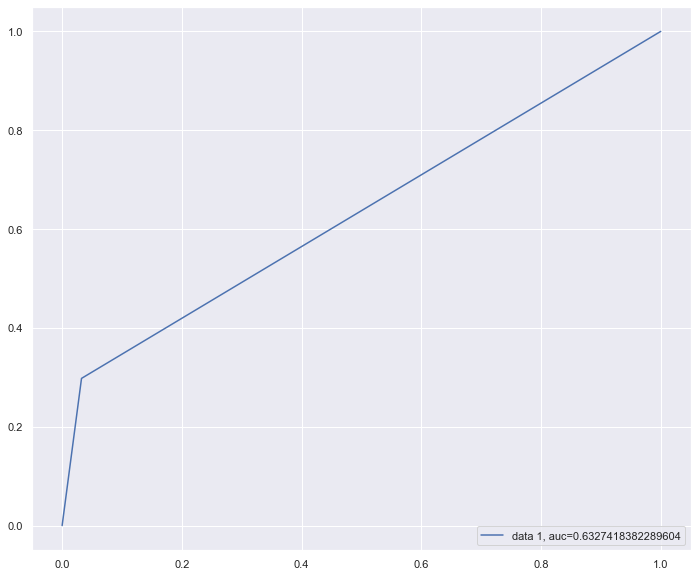

In [72]:
xgboost.fit(X_train,Y_train)
Y_pred_xg = xgboost.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_xg = confusion_matrix(Y_test, Y_pred_xg)
#evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_xg))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_xg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_xg)))
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_xg=accuracy_score(Y_test, Y_pred_xg)
f1_xg=f1_score(Y_test, Y_pred_xg, average="macro")
p_xg=precision_score(Y_test, Y_pred_xg, average="macro")
r_xg=recall_score(Y_test, Y_pred_xg, average="macro")
print("accuracy = ",100*accuracy_xg)
print("p = ",p_xg)
print("r = ",r_xg)
print("f1 = ",f1_xg)
print(classification_report(Y_test, Y_pred_xg))
# Plot ROC curve
fpr_xg, tpr_xg, _ = metrics.roc_curve(Y_test,  Y_pred_xg)
auc_xg = metrics.roc_auc_score(Y_test,  Y_pred_xg)
plt.plot(fpr_xg,tpr_xg,label="data 1, auc="+str(auc_xg))
plt.legend(loc=4)
plt.show()

***
## Recommendation

SHAP

In [ ]:
!pip install shap

In [24]:
import shap
import pandas as pd 
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

In [25]:
# Initialize JavaScript visualization - use Jupyter notebook to see the interactive features of the plots
shap.initjs()

In [61]:
# Create a TreeExplainer and extract shap values from it - will be used for plotting later
xgboost.fit(X,Y)
explainer = shap.TreeExplainer(xgboost)
shap_values = explainer.shap_values(X)

In [34]:
import matplotlib.pyplot as pl

In [37]:
# shap force plot for the first prediction. Here we want to interpret the output value for the 1st observation in our dataframe. 
import matplotlib.pyplot as plt1
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])


***
## SHAP DATASET POPULATING

In [121]:
X.columns[20]

'OverTime'

In [135]:
recs = []
for i in range(1470):
    shap_list = list(shap_values[i])
    max_shap = max(shap_list)
    index = shap_list.index(max_shap)
    label = X.columns[index]
    recs.append(label)

In [140]:
df_recs = pd.read_csv('emp_att.csv')
df_recs['AttritionCause'] = recs
df_recs.head(5)
df_recs.to_csv('emp_att_recs.csv')

***
## Other SHAP work

In [100]:
# shap force plot for the first prediction. Here we want to interpret the output value for the 1st observation in our dataframe. 
import matplotlib.pyplot as plt1
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1,:], X.iloc[1,:])

In [112]:
import math
shap_list = list(shap_values[1])
max_shap = max(shap_list)
index = shap_list.index(max_shap)
print(index,max_shap)

2 0.85495484


In [123]:
X.columns[2]

'DailyRate'

In [114]:
import math
shap_list = list(shap_values[10])
max_shap = max(shap_list)
index = shap_list.index(max_shap)
print(index,max_shap)

8 0.72430825


In [ ]:
shap.initjs()
# SHAP values for all predictions and the direction of their impact
shap.force_plot(explainer.expected_value, shap_values, X)
#shap summary plot plotting

NameError: name 'pyplot' is not defined

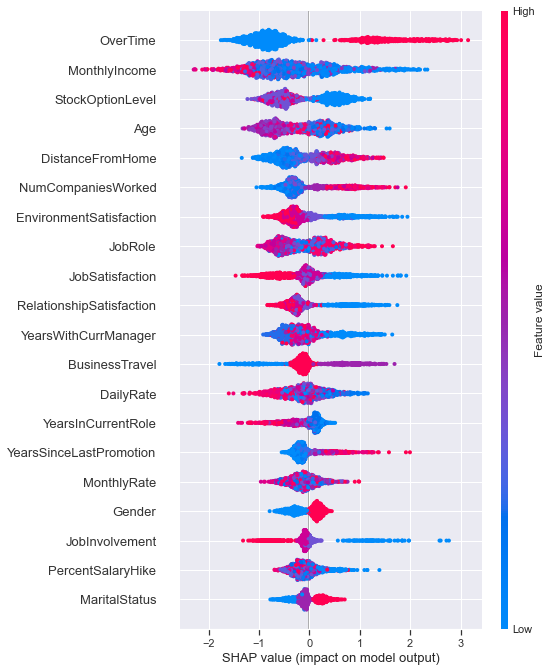

In [65]:
import matplotlib.pyplot as pl
shap.summary_plot(shap_values, X, show=False)
pl.savefig("shap_summary.png",dpi=700) #.png,.pdf will also support here
pyplot.show()

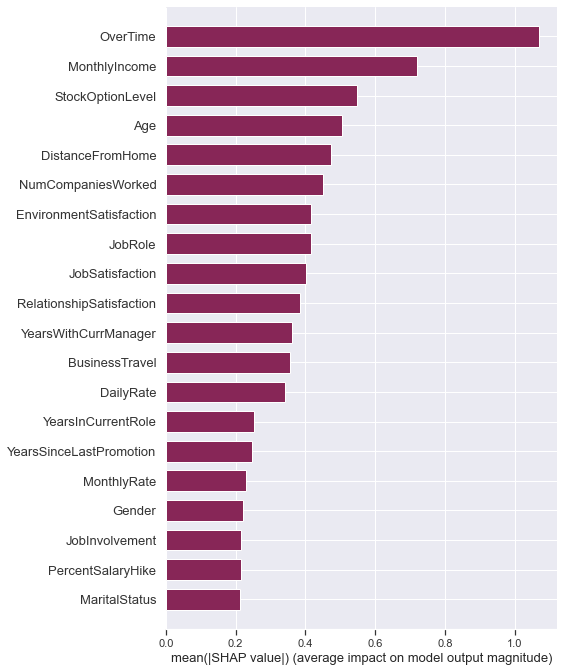

In [98]:
shap.summary_plot(shap_values, X, plot_type="bar",color='#872657')

In [74]:
feature_names = X_train.columns
xgb_results = pd.DataFrame(shap_values, columns = feature_names)
values = np.abs(xgb_results.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, values)), columns=['Column','FeatureImportanceValues'])
shap_importance.sort_values(by=['FeatureImportanceValues'], ascending=False, inplace=True)
shap_importance.head()

,Column,FeatureImportanceValues
20,OverTime,1.069057
16,MonthlyIncome,0.720950
25,StockOptionLevel,0.547315
0,Age,0.505110
4,DistanceFromHome,0.473893


In [36]:
df_no_enc['JobRole']

0       7
1       6
2       2
3       6
4       2
       ..
1465    2
1466    0
1467    4
1468    7
1469    2
Name: JobRole, Length: 1470, dtype: int64

***
## VISUALISATION

In [191]:
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import joblib
from pandas_profiling import ProfileReport

In [192]:
dataset = pd.read_csv("emp_att.csv")
profile = ProfileReport(dataset, minimal=True)
profile.to_file(output_file="emp_att_vis.html")

Summarize dataset:   0%|          | 0/44 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [193]:
dataset.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


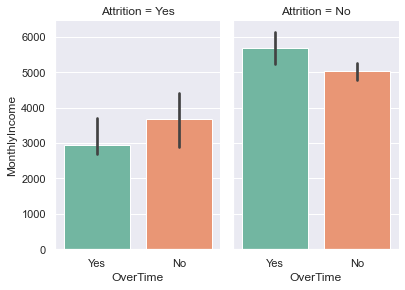

In [194]:
sns.set_palette("Set2")
sns.catplot(x='OverTime', y='MonthlyIncome',col='Attrition', data=dataset, estimator=np.median,height=4, aspect=.7,kind='bar')

In [ ]:
plt.bar(dataset[yes])

***
# RECOMMENDATION 

In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [185]:
data = pd.read_csv('emp_att_recs_filled.csv')
x = 0
for col in data.columns:
    print(col, '  =  ',type(col))
    x+=1
print(x)

Age   =   <class 'str'>
Attrition   =   <class 'str'>
BusinessTravel   =   <class 'str'>
DailyRate   =   <class 'str'>
Department   =   <class 'str'>
DistanceFromHome   =   <class 'str'>
Education   =   <class 'str'>
EducationField   =   <class 'str'>
EmployeeCount   =   <class 'str'>
EmployeeNumber   =   <class 'str'>
EnvironmentSatisfaction   =   <class 'str'>
Gender   =   <class 'str'>
HourlyRate   =   <class 'str'>
JobInvolvement   =   <class 'str'>
JobLevel   =   <class 'str'>
JobRole   =   <class 'str'>
JobSatisfaction   =   <class 'str'>
MaritalStatus   =   <class 'str'>
MonthlyIncome   =   <class 'str'>
MonthlyRate   =   <class 'str'>
NumCompaniesWorked   =   <class 'str'>
Over18   =   <class 'str'>
OverTime   =   <class 'str'>
PercentSalaryHike   =   <class 'str'>
PerformanceRating   =   <class 'str'>
RelationshipSatisfaction   =   <class 'str'>
StandardHours   =   <class 'str'>
StockOptionLevel   =   <class 'str'>
TotalWorkingYears   =   <class 'str'>
TrainingTimesLastYear   

In [186]:
descriptions = data['Age'].apply(str)+' '+data['BusinessTravel'].apply(str)+' '+data['DailyRate'].apply(str)+' '+data['Department'].apply(str)+' '+data['DistanceFromHome'].apply(str)+' '+data['Education'].apply(str)+' '+data['EducationField'].apply(str)+' '+data['EmployeeCount'].apply(str)+' '+data['EnvironmentSatisfaction'].apply(str)+' '+data['Gender'].apply(str)+' '+data['HourlyRate'].apply(str)+' '+data['JobInvolvement'].apply(str)+' '+data['JobLevel'].apply(str)+' '+data['JobRole'].apply(str)+' '+data['JobSatisfaction'].apply(str)+' '+data['MaritalStatus'].apply(str)+' '+data['MonthlyIncome'].apply(str)+' '+data['MonthlyRate'].apply(str)+' '+data['NumCompaniesWorked'].apply(str)+' '+data['Over18'].apply(str)+' '+data['OverTime'].apply(str)+' '+data['PercentSalaryHike'].apply(str)+' '+data['PerformanceRating'].apply(str)+' '+data['RelationshipSatisfaction'].apply(str)+' '+data['StandardHours'].apply(str)+' '+data['StockOptionLevel'].apply(str)+' '+data['TotalWorkingYears'].apply(str)+' '+data['TrainingTimesLastYear'].apply(str)+' '+data['WorkLifeBalance'].apply(str)+' '+data['YearsAtCompany'].apply(str)+' '+data['YearsInCurrentRole'].apply(str)+' '+data['YearsSinceLastPromotion'].apply(str)+' '+data['YearsWithCurrManager'].apply(str)




In [187]:
descriptions[0]

'18 Non-Travel 247 Research & Development 8 1 Medical 1 3 Male 80 3 1 Laboratory Technician 3 Single 1904 13556 1 Y No 12 3 4 80 0 0 0 3 0 0 0 0'

In [188]:
def create_similarity_matrix(new_description, overall_descriptions):
    #Append the new description to the overall set.
    overall_descriptions.append(new_description)
    # Define a tfidf vectorizer and remove all stopwords.
    tfidf = TfidfVectorizer()
    #Convert tfidf matrix by fitting and transforming the data.
    tfidf_matrix = tfidf.fit_transform(overall_descriptions)
    # output the shape of the matrix.
    tfidf_matrix.shape
    # calculating the cosine similarity matrix.
    cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)
    return cosine_sim

In [189]:
def get_recommendations(new_description,overall_descriptions):
    # create the similarity matrix
    cosine_sim = create_similarity_matrix(new_description,overall_descriptions)
    # Get pairwise similarity scores of all the students with new student.
    sim_scores = list(enumerate(cosine_sim[-1]))
    # Sort the descriptions based on similarity score.
    sim_scores = sorted(sim_scores,key =lambda x:x[1],reverse= True )
    # Get the scores of top 5 descriptions.
    sim_scores = sim_scores[1:6]
    # Get the student indices.
    indices = [i[0]for i in sim_scores]
    return data.iloc[indices]

In [190]:
new_description = pd.Series('20 Travel_Rarely 247 Sales 8 1 Life Sciences 1 3 Male 98 3 1 Sales Representative 4 Divorced 4171 26092 1 Y No 12 3 4 80 0 1 1 3 0 1 0 0')
get_recommendations(new_description,descriptions)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionCause,Recommendation
1102,43,No,Travel_Rarely,1179,Sales,2,3,Medical,1,1706,...,1,10,3,3,10,9,8,8,RelationshipSatisfaction,Provide support for counselling and therapy
891,38,No,Travel_Rarely,723,Sales,2,4,Marketing,1,1835,...,2,20,4,2,4,2,0,3,OverTime,Compensate fairly for overtime work
535,33,No,Travel_Rarely,217,Sales,10,4,Marketing,1,1924,...,0,10,2,2,10,4,0,9,StockOptionLevel,Increase stock option levels
706,35,Yes,Travel_Rarely,303,Sales,27,3,Life Sciences,1,1797,...,0,10,2,3,10,7,7,7,OverTime,Compensate fairly for overtime work
242,28,Yes,Travel_Rarely,1475,Sales,13,2,Marketing,1,1933,...,0,6,0,3,2,0,2,2,OverTime,Compensate fairly for overtime work


***